# Log book 5

### Complex choreographies

13/03/23

A calculation of more complex choreographies that do not all follow the same orbit just with different phases. 

For this section I will be simulating 3 bodies and will use the initial conditions found in the paper:

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.110.114301



This notebook contains the data for many complex choreographies, the choreography name just has to be changed when calling the control function.



In [1]:
#Import statements
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def N_body_update_2D(t, init_list):
    """Updates positions and velocities for N bodies, assumes masses of all bodies and G = 1 
    and position and velocity vectors to be 2D. Also calculates angular momentum every 100 steps.
    
    Inputs:
    t: time variable
    init_list: list of initial and newly calcualated positions and velocities
    
    Returns:
    next_val: Array containing updated values based on differential equations
    """
    
    
    v_index = int(len(init_list)/2)
    next_v = []
    next_r = []
    
    for i in range(0, v_index, 2):
        r_i = init_list[i:i+2]
        v_i = init_list[v_index + i: v_index + i + 2]
        
        
        r_other = init_list[:v_index]
        r_other = np.concatenate((r_other[:i], r_other[i+2:]))
        
        v_new = np.array((0., 0.))
        for j in range(0, len(r_other), 2):
            v_new += (r_other[j:j+2] - r_i)/(np.linalg.norm(r_other[j:j+2] - r_i)**3)
        
        next_v.append(v_new)
        next_r.append(v_i)
    next_val = np.concatenate((next_r, next_v), axis=None)
    return next_val

In [3]:
def ang_mom_calc_plot(r1, r2, r3, v1, v2, v3, t_arr, M, choreography):
    """ A function to calculate and plot the angular momentum 
    for a body given its position and velocicty
    
    Assumes orbit of only 3 bodies all with mass = 1 
    
    Inputs:
    r1, r2, r3: numpy arrays of positions of bodies 1, 2 and 3
    v1, v2, v3: numpy arrays of velocities of bodies 1, 2 and 3
    t_arr: array of times system calculated at
    M: number of points to be plotted
    Choreography: Name of the specific choreogrpahy
    
    """

    r1_3D = np.zeros((len(r1), 3))
    r2_3D = np.zeros((len(r1), 3))
    r3_3D = np.zeros((len(r1), 3))
    v1_3D = np.zeros((len(r1), 3))
    v2_3D = np.zeros((len(r1), 3))
    v3_3D = np.zeros((len(r1), 3))
    
    rCOM_3D = (r1_3D + r2_3D + r3_3D)/3


    for i in range(len(r1)):
        r1_3D[i] = np.append(r1[i], 0)
        r2_3D[i] = np.append(r2[i], 0)
        r3_3D[i] = np.append(r3[i], 0)
        v1_3D[i] = np.append(v1[i], 0)
        v2_3D[i] = np.append(v2[i], 0)
        v3_3D[i] = np.append(v3[i], 0)
        

    ang_mom1 = np.cross(v1_3D, (r1_3D - rCOM_3D))
    ang_mom2 = np.cross(v2_3D, (r2_3D - rCOM_3D))
    ang_mom3 = np.cross(v3, (r3_3D - rCOM_3D))
    
    ang_mom = ang_mom1 + ang_mom2 + ang_mom3
    
    
    plt.figure(figsize=(5.9, 5.9))
    plt.plot(t_arr[:M], ang_mom[:M, 2])
    
    plt.xlabel("t")
    plt.ylabel("L")
    plt.title(f"Total angular momentum for {choreography}")
    
    #Saving the image to device for report
    #plt.savefig(f'Pictures/CHORS/{choreography}_angMom.png')
    return ang_mom

In [4]:
def init_plot(init_params, choreography, limx, limy):
    """Plots the initial positions and first step direction for an array of 
       init_params of form [x1, x2,..., xn, v1, v2,...,vn]
       
       Inputs:
       init_params: Initial parameters to be plotted
       title: title of the graph
       limx, limy: Limits of plot in x and y direction as 2 element array eg [-2, 2]
    """
    # Plotting initial positions
    
    color = ['b', 'b', 'g', 'g', 'r', 'r', 'c', 'c', 'y', 'y', 'm', 'm'] #List of some matplotlib colors

    plt.figure(figsize=(6, 6))
    dt = 0.35 #Scaling of velocity arrow
    
    half_index = int(len(init_params)/2)

    for i in range(0, half_index, 2):
        plt.plot(init_params[i], init_params[i+1], 'o', ms=10, 
                 label = f"Start: {int(i/2+1)}")
        
        plt.arrow(init_params[i], init_params[i+1], 
                  dt*init_params[i+half_index], dt*init_params[i+half_index+1],
                 head_width = .1, facecolor = color[i], edgecolor = 'k')



    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{choreography} initial conditions")
    
    plt.xlim(limx)
    plt.ylim(limy)


    plt.legend()
    
    #Saving the image to device for report
   # plt.savefig(f'Pictures/CHORS/{choreography}_init.png')

In [5]:
def final_plot(sol, init_params, choreography, M):
    """ Plots the start positions and orbit path from scipy solve_ivp
    Inputs:
    sol: return from a scipy solve_ivp call
    init_params: initial parameters list (same as inputted to solve_ivp
    title: title of the graph
    M: Number of points to plot
    """
    
    plt.figure(figsize=(5.8, 5.8))

    for i in range(0, int(len(init_params)/2),2):
        plt.plot(sol.y[i, 0], sol.y[i+1, 0], 'o', ms=10, label = f"Start: {int(i/2+1)}")
        plt.plot(sol.y[i, :M], sol.y[i+1, :M], label = f"Orbit: {int(i/2+1)}")


    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{choreography} choreography - {M} terms")

    plt.legend(loc="lower left", ncol=3)
    
    #Saving the image to device for report
    #plt.savefig(f'Pictures/CHORS/{choreography}_final.png')

In [6]:
def init_complex_choreographies(choreography):
    """Calculates the initial conditions for a 3 body choreography given by name. 
       Initial conditions taken from https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.110.114301
       
       Inputs:
       choreography: The name of a given choreography. 
       Options are:
       [ButterflyI, ButterflyII, ButterlyIII, ButterlyIV, Bumblebee, 
       MothI, MothII, MothIII, Goggles, Dragonfly, Yarn,
       Yin_yangIa, Yin_yangIb, Yin_yangIIa, Yin_yangIIb]
       
       Returns:
       init_params: list of initial parameters in form [x1, y1,...,x3, y3, vx1, vy1,...,vx3, vy3]
       T: time period for the given orbit
       
    """
    #Setting values common to all choreographies
    x1 = -1
    x2 = 1
    x3 = 0
    y1 = y2 = y3 = 0
    
    
    #Could have used a dictionary to do this more easily,
    #but haven't covered it in the course so used 2 lists instead
    choreographies = ['ButterflyI', 'ButterflyII', 'ButterflyIII', 'ButterflyIV', 'Bumblebee', 
       'MothI', 'MothII', 'MothIII', 'Goggles', 'Dragonfly', 'Yarn',
       'Yin_yangIa', 'Yin_yangIb', 'Yin_yangIIa', 'Yin_yangIIb']
    values = np.array([[0.30689, 0.12551, 6.2356], #butterflyI
              [0.39295, 0.09758, 7.0039], #butterflyII
              [0.40592, 0.23016, 13.8658], #butterflyIII
              [0.350112, 0.07934, 79.4759], #butterflyIV
              [0.18428, 0.58719, 63.5345], #bumblebee
              [0.46444, 0.39606, 14.8939], #mothI
              [0.43917, 0.45297, 28.6703], #mothII
              [0.38344, 0.37736, 25.8406], #mothIII
              [0.08330, 0.12789, 10.4668], #goggles
              [0.08058, 0.58884, 21.2710], #dragonfly
              [0.55906, 0.34919, 55.5018], #yarn
              [0.51394, 0.30474, 17.3284], #yin_yangIa
              [0.28270, 0.32721, 10.9626], #yin_yangIb
              [0.41682, 0.33033, 55.7898], #yin_yangIIa
              [0.41734, 0.31310, 54.2076], #yin_yangIIb
             ])


    for i, name in enumerate(choreographies):
        if name == choreography:
            vx1 = values[i, 0]
            vy1 = values[i, 1]
            T = values[i, 2]
            break
    else:
        print("Not a valid choreography")
        return None, None
    
    #Velocities common to all orbts
    vx2 = vx1
    vx3 = -2*vx1

    vy2 = vy1
    vy3 = -2*vy1


    init_params = np.array([x1, y1, x2, y2, x3, y3,
                                vx1, vy1, vx2, vy2, vx3, vy3])
    return init_params, T

In [7]:
def solve_choreography(init_params, T):
    """Solves the differential equation for a given set of initial params 
       over 2 times the time period of the orbit for a total of 10000 points
       using scipy solve_ivp RK45 method.
    Inputs:
    init_params: list of initial parameters
    T: time period for a full orbit
    Returns:
    sol: solution returned from solve_ivp
    t_eval: times solution calculated at
    """
    t_eval = np.linspace(0, 2*T, 10000)
    
    sol = integrate.solve_ivp(N_body_update_2D, [0, 2*T], init_params, t_eval=t_eval, method='RK45',
                             rtol=1e-11)
    
    return sol, t_eval


In [8]:
def control(choreography, limx, limy, M):
    """ A function to calculate plot initial conditions, calculate the solution 
    and plot final solution for a given choreography
    Inputs: 
    choreography: the chosen choreography
    limx, limy: Limits of plot in x and y direction as 2 element array eg [-2, 2]
    M: Number of terms to plot
    """
    init_params, T = init_complex_choreographies(choreography=choreography)
    init_plot(init_params, choreography, limx, limy)
    
    sol_chor, t_eval = solve_choreography(init_params, T)
    print(f"Simulation was a success: {sol_chor.success}")
    
    final_plot(sol_chor, init_params, choreography, M=M)
    
    r1 = sol_chor.y[0:2]
    r2 = sol_chor.y[2:4]
    r3 = sol_chor.y[4:6]
    v1 = sol_chor.y[6:8]
    v2 = sol_chor.y[8:10]
    v3 = sol_chor.y[10:12]
    ang_mom = ang_mom_calc_plot(r1.T, r2.T, r3.T, v1.T, v2.T, v3.T, t_eval, M, choreography)
    
    

Simulation was a success: True


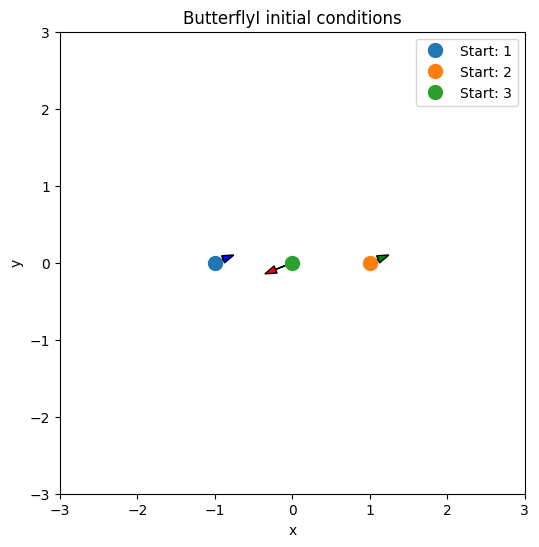

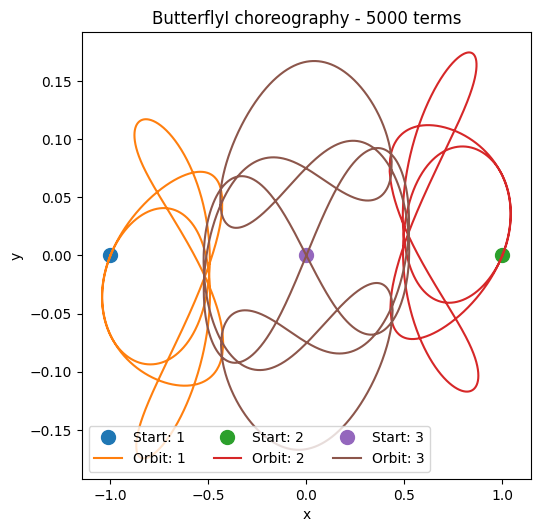

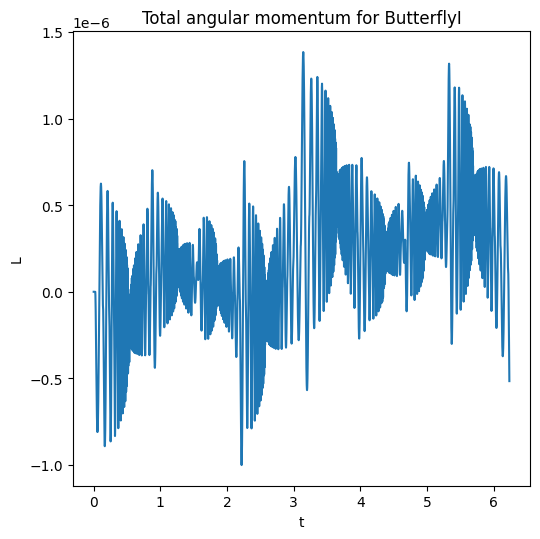

In [11]:
#Example plot of ButterflyI choreography 
#first parameter in the control function just needs to be changed to get a different choreography
control('ButterflyI', [-3, 3], [-3, 3], 5000)

In [10]:
    #list of choreographies: 'ButterflyI', 'ButterflyII', 'ButterflyIII', 'ButterflyIV', 'Bumblebee', 
     #  'MothI', 'MothII', 'MothIII', 'Goggles', 'Dragonfly', 'Yarn',
     #  'Yin_yangIa', 'Yin_yangIb', 'Yin_yangIIa', 'Yin_yangIIb'